In [528]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [529]:
result = []

## 1)Получите данные и загрузите их в рабочую среду.

In [530]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.assign(MedHouseVal = data.target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2)Проведите первичный анализ.

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Нормализация популяции

Удалим выбросы, так как нормализация к ним чувствительна

{'whiskers': [<matplotlib.lines.Line2D at 0x1c718e29490>,
 'caps': [<matplotlib.lines.Line2D at 0x1c718e29a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c718e29160>],
 'medians': [<matplotlib.lines.Line2D at 0x1c718e2a030>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c718e2a300>],
 'means': []}

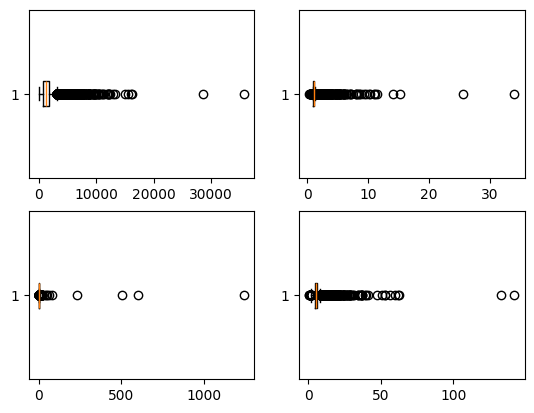

In [532]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].boxplot(df["Population"], vert = False)
axis[1, 0].boxplot(df["AveOccup"], vert = False)
axis[0, 1].boxplot(df["AveBedrms"], vert = False)
axis[1, 1].boxplot(df["AveRooms"], vert = False)

In [533]:
df = df[df["Population"] < 2000]

### корреляционная матрица

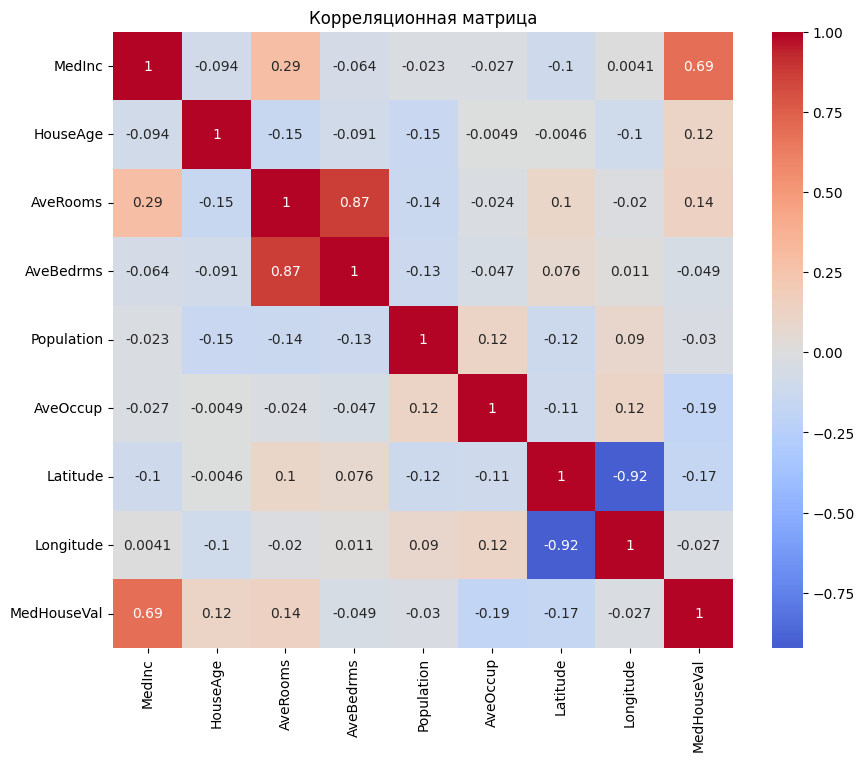

In [534]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

# Настройка заголовка и отображение графика
plt.title('Корреляционная матрица')
plt.show()

In [535]:
df = df.drop("MedInc", axis=1)
df

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
...,...,...,...,...,...,...,...,...
20635,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 3)Разделите выборку на обучающее и тестовое подмножества.

In [536]:
X = df[["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]
Y = df[["MedHouseVal"]]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

## 4)Обучите модель регрессии на обучающем множестве.

In [537]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 5)Для тестового множества посчитайте точность предсказания модели.

In [538]:
model.score(X_test, y_test)

0.4348466611387186

## 6)Обучите дерево решений на обучающем множестве.

In [539]:
modelTree = DecisionTreeRegressor(max_depth=2, random_state=35)
modelTree.fit(X_train, y_train)
modelTree.score(X_test, y_test)

result.append(["Глубина 2", modelTree.score(X_test, y_test)])

[Text(0.5, 0.8333333333333334, 'AveRooms <= 0.378\nsquared_error = 1.412\nsamples = 11869\nvalue = 2.087'),
 Text(0.25, 0.5, 'AveOccup <= -0.412\nsquared_error = 1.131\nsamples = 10005\nvalue = 1.915'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 1.631\nsamples = 3065\nvalue = 2.431'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.741\nsamples = 6940\nvalue = 1.687'),
 Text(0.75, 0.5, 'AveBedrms <= 0.223\nsquared_error = 1.907\nsamples = 1864\nvalue = 3.011'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 1.519\nsamples = 1452\nvalue = 3.354'),
 Text(0.875, 0.16666666666666666, 'squared_error = 1.404\nsamples = 412\nvalue = 1.803')]

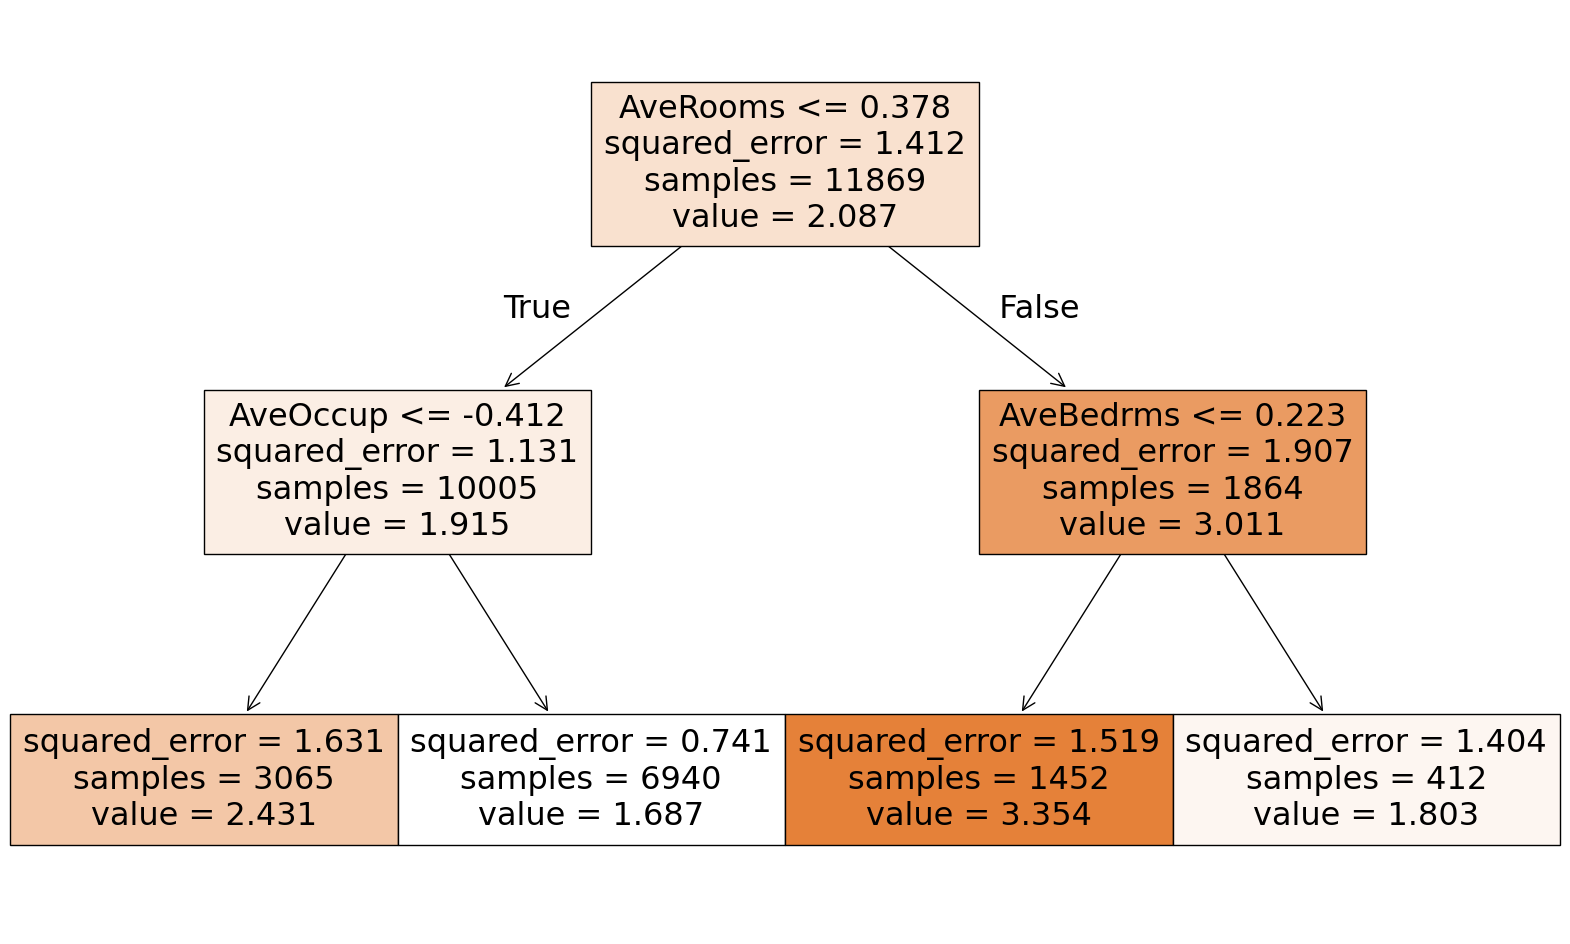

In [540]:
plt.figure(figsize=(20, 12))
plot_tree(modelTree, feature_names=["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"], filled=True)

## 7)Оптимизируйте глубину дерева (max_depth).

In [541]:
modelTree = DecisionTreeRegressor(splitter = "random", max_depth=10, random_state=35)
modelTree.fit(X_train, y_train)
modelTree.score(X_test, y_test)

result.append(["Глубина 10 и разделитель случайный", modelTree.score(X_test, y_test)])

In [542]:
modelTree = DecisionTreeRegressor(max_depth=10, random_state=35)
modelTree.fit(X_train, y_train)
modelTree.score(X_test, y_test)

result.append(["Глубина 10", modelTree.score(X_test, y_test)])

## 8)Сформулируйте выводы по проделанной работе.

In [543]:
pd.DataFrame(result, columns=["Параметры", "Метрика"])

,Параметры,Метрика
0,Глубина 2,0.230204
1,Глубина 10 и разделитель случайный,0.476500
2,Глубина 10,0.706704


Наибольшую точность удалось достичь, с помощью 10 глубины. Данная модель может использоваться для предсказание рекомендованной цены, когда человек выставляет свой дом на продажу. Эта модель поможет продавцам с анализом цены, но все же имеет низкую точность. 


Если собрать по больше параметров и повысить точность, то модель можно использовать в качестве показателя, завышина ли данная цена на текущий дом, или она рыночная.